In [24]:
import numpy as np
import tensorflow as tf
from PIL import ImageFont
import visualkeras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint


In [2]:
try:
    with open('data/dataset.txt', 'r', encoding='utf-8') as file:
        text = file.read()
    print("Success: File loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")
except UnicodeDecodeError:
    print("Error: There was a problem decoding the file. Try using a different encoding.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Success: File loaded successfully.


### **Tokenizing**

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
print(total_words)

In [4]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


### **converting to Categorical**

In [5]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

### **Model**

In [21]:
# Define the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))  # Specify input length
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.build((None, max_sequence_len - 1))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

c:\Users\asaha7\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 17, 100)        │       820,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8200)           │     1,238,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,208,800 (8.43 MB)

 Trainable params: 2,208,800 (8.43 MB)

 Non-trainable params: 0 (0.00 B)

None


c:\Users\asaha7\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


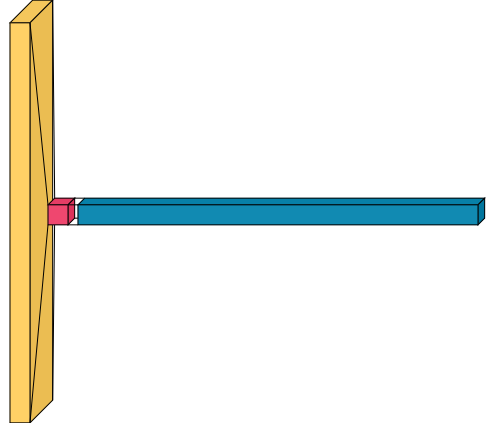

In [34]:
visualkeras.layered_view(model, to_file='img/output.png', show_dimension=True)

In [ ]:
# Define the file path where the model will be saved
model_save_path = 'model/model_checkpoint.keras'

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    model_save_path,          # Path to save the model file
    monitor='loss',           # Metric to monitor
    save_best_only=True,     # Save only the best model
    mode='min',               # Save when the monitored quantity is minimized
    verbose=1                 # Verbosity mode
)

# Train the model with the checkpoint callback
model.fit(X, y, epochs=100, batch_size=32, callbacks=[checkpoint])


In [1]:
def generate_text(seed_text, next_words, tokenizer, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word

    return seed_text


In [41]:
# Example usage
seed_text = input()
next_words = 3
generated_text = generate_text(seed_text, next_words, tokenizer, model, max_sequence_len)
print(generated_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
I was going to watch you but
